In [73]:
import pandas as pd
from pymongo import MongoClient
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import json
from bson import json_util


In [74]:
g_env='localhost'
g_port=27017

In [75]:
client1 = MongoClient(g_env,g_port)
#client = MongoClient()
db = client.backend_production

In [79]:
data=db.properties.find().limit(1)

In [27]:
dd_ca=db.properties.find( {"country": "Canada"}, {"status": "active"} )

In [89]:
dd_ca=db.properties.find( {"country": "Canada"})

In [90]:
df = pd.DataFrame.from_dict(dd_ca, orient='columns')

In [96]:
df_ca=df

In [97]:
(df_ca.isna().mean().round(4)*100).sort_values(ascending=False)

has_pond                 100.00
has_dock                 100.00
foreclosure              100.00
is_wired                 100.00
has_barbecue_area        100.00
is_new_construction      100.00
intercom                 100.00
has_basement             100.00
heating_systems          100.00
heating_fuels            100.00
has_wet_bar              100.00
has_vaulted_ceiling      100.00
has_sprinkler_system     100.00
has_sports_court         100.00
has_skylight             100.00
has_security_system      100.00
has_sauna                100.00
has_rv_parking           100.00
has_porch                100.00
has_ceiling_fan          100.00
has_patio                100.00
has_mother_in_law        100.00
has_jetted_bath_tub      100.00
has_hot_tub_spa          100.00
has_green_house          100.00
has_gated_entry          100.00
has_garden               100.00
has_deck                 100.00
has_disabled_access      100.00
has_elevator             100.00
                          ...  
cover_pu

In [108]:
# drop unecessary features (more than 50% records are null)
ca_drop_features=["has_pond", #100
"has_dock",
"foreclosure",              
"is_wired",                 
"has_barbecue_area",        
"is_new_construction",      
"intercom",                 
"has_basement",             
"heating_systems",          
"heating_fuels",            
"has_wet_bar",              
"has_vaulted_ceiling",      
"has_sprinkler_system",     
"has_sports_court",         
"has_skylight",             
"has_security_system",      
"has_sauna",                
"has_rv_parking",           
"has_porch",                
"has_ceiling_fan",         
"has_patio",                
"has_mother_in_law",        
"has_jetted_bath_tub",      
"has_hot_tub_spa",          
"has_green_house",          
"has_gated_entry",          
"has_garden",               
"has_deck",                
"has_disabled_access",      
"has_elevator",
"cooling_systems",#            100.00
"brokerage_website_url",#      100.00
"lead_routing_email",#         100.00
"architecture_style",#         100.00
"has_double_pane_windows",#    100.00
"agent_phone",#                100.00
"has_doorman",#                100.00
"brokerage_logo_url",#         100.00
"fees",#                       100.00
"external_url",#               100.00
"agent_id",#                   100.00
"num_floors",#                 100.00
"open_houses",#                100.00
"exterior_types",#             100.00
"price_cents_sqft",#           100.00
"brokerage_phone",#            100.00
"agent_email",#                100.00
"rooms",#                      100.00
"tax_amount",#                 100.00
"tags",#                       100.00
"agent_avatar_url",#           100.00
"scoring",#                    100.00
"school",#                     100.00
"brokerage_email",#            100.00
"room_count",#                 100.00
"building_sqft",#              99.33
"lot_sqft",#                   97.40
"total_sqft",#                 94.25
"roof_types",#                 86.29
"unit_number",#81.94
"building_utilities",#79.65
"floors",#65.05
"partial_bathrooms", # 54.05  
"is_waterfront"                  
                  
]

In [109]:
df_ca_drop=df_ca.drop(ca_drop_features, axis=1)

In [110]:
(df_ca_drop.isna().mean().round(4)*100).sort_values(ascending=False)

utilities                32.60
parking_types            31.47
listing_date             27.63
year_built               21.28
lower_location_id        10.18
location_ids             10.18
agent_fname               7.81
agent_lname               7.81
is_waterfront             7.81
property_sub_type         4.16
listing_type              3.47
location                  2.68
postal                    1.26
bathrooms                 1.17
cover_public_url          0.13
created_at                0.00
description               0.00
country                   0.00
brokerage_external_id     0.00
city                      0.00
brokerage_name            0.00
external_type             0.00
beds                      0.00
agent_key                 0.00
address_street            0.00
address_number            0.00
external_id               0.00
images                    0.00
geocoded                  0.00
has_fireplace             0.00
has_garage                0.00
has_pool                  0.00
latitude

In [140]:
#Rmove WHO and additional features
ca_drop_features_who=["created_at","updated_at","modified_at","description","listing_date"]

In [141]:
df_ca_drop_who=df_ca_drop.drop(ca_drop_features_who, axis=1)

In [142]:
df_ca_drop_who.columns

Index(['_id', 'address_number', 'address_street', 'agent_fname', 'agent_key',
       'agent_lname', 'bathrooms', 'beds', 'brokerage_external_id',
       'brokerage_name', 'city', 'country', 'cover_public_url', 'external_id',
       'external_type', 'geocoded', 'has_fireplace', 'has_garage', 'has_pool',
       'images', 'is_waterfront', 'latitude', 'listing_status', 'listing_type',
       'listing_url', 'location', 'location_ids', 'longitude',
       'lower_location_id', 'mls_number', 'parking_types', 'postal',
       'price_cents', 'property_sub_type', 'property_type', 'province',
       'status', 'utilities', 'year_built'],
      dtype='object')

In [150]:
df_ca_drop_who.groupby('year_built')['year_built'].value_counts().sort_values(ascending=False)


year_built  year_built
2018.0      2018.0        3969
2019.0      2019.0        2320
2017.0      2017.0        1616
2008.0      2008.0        1378
2007.0      2007.0        1281
2006.0      2006.0        1268
2016.0      2016.0        1220
2013.0      2013.0        1160
2005.0      2005.0        1131
2014.0      2014.0        1124
2009.0      2009.0        1116
2015.0      2015.0        1100
2012.0      2012.0        1054
2010.0      2010.0        1032
2011.0      2011.0         879
2004.0      2004.0         865
2003.0      2003.0         774
1978.0      1978.0         756
1980.0      1980.0         746
1976.0      1976.0         705
2002.0      2002.0         695
1975.0      1975.0         665
1977.0      1977.0         655
1997.0      1997.0         652
1993.0      1993.0         652
1992.0      1992.0         640
1998.0      1998.0         635
1994.0      1994.0         627
1990.0      1990.0         622
1979.0      1979.0         619
                          ... 
1841.0      1841

In [166]:
df_ca_drop_who.groupby('year_built')['year_built'].count().sort_values(ascending=False)


year_built
2018.0    3969
2019.0    2320
2017.0    1616
2008.0    1378
2007.0    1281
2006.0    1268
2016.0    1220
2013.0    1160
2005.0    1131
2014.0    1124
2009.0    1116
2015.0    1100
2012.0    1054
2010.0    1032
2011.0     879
2004.0     865
2003.0     774
1978.0     756
1980.0     746
1976.0     705
2002.0     695
1975.0     665
1977.0     655
1997.0     652
1993.0     652
1992.0     640
1998.0     635
1994.0     627
1990.0     622
1979.0     619
          ... 
1841.0       2
2099.0       2
1886.0       2
1864.0       2
1819.0       2
1882.0       2
1883.0       2
1835.0       2
1800.0       1
1792.0       1
1793.0       1
1089.0       1
1784.0       1
1776.0       1
1771.0       1
1700.0       1
1808.0       1
1805.0       1
1851.0       1
1811.0       1
1816.0       1
1820.0       1
1832.0       1
1833.0       1
1836.0       1
1839.0       1
1843.0       1
1854.0       1
1858.0       1
1081.0       1
Name: year_built, Length: 202, dtype: int64

In [189]:
# well, False is too big, so no use of this column. lets remove 
df_ca_drop_who.groupby('is_waterfront')['is_waterfront'].value_counts().sort_values(ascending=False)


is_waterfront  is_waterfront
False          False            55840
True           True              3569
Name: is_waterfront, dtype: int64

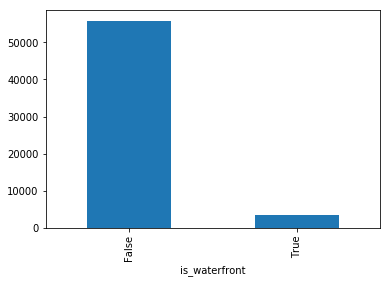

In [190]:
# well, False is too big, so no use of this column. lets remove 
b=df_ca_drop_who.groupby('is_waterfront')["is_waterfront"].count()
# a simple line plot
b.plot(kind='bar',x='is_waterfront',y='count')


In [173]:
df_ca_drop_who.groupby('brokerage_name')["brokerage_name"].count().sort_values(ascending=False)


brokerage_name
Sutton Group-West Coast Realty                           901
CIR REALTY                                               626
Royal LePage Atlantic                                    604
RE/MAX Real Estate                                       586
RE/MAX Elite                                             585
RE/MAX REAL ESTATE (CENTRAL)                             508
RE/MAX FIRST                                             441
RE/MAX HOUSE OF REAL ESTATE                              384
Royal Pacific Realty Corp.                               384
Nu Stream Realty Inc.                                    377
RE/MAX Kelowna                                           365
Royal LePage Kelowna                                     350
Royal Lepage Noralta Real Estate                         328
RE/MAX REALTY PROFESSIONALS                              309
PURPLEBRICKS                                             304
RE/MAX Saskatoon                                         302
Macdonald

In [ ]:
###########################################################
###########################################################


In [93]:
df.groupby(['province','status'])['status'].count()

province                 status
Alberta                  active    15583
British Columbia         active    18698
New Brunswick            active     2343
Newfoundland & Labrador  active     2725
Nova Scotia              active     3173
Ontario                  active    16008
Prince Edward Island     active      484
Saskatchewan             active     5428
Name: status, dtype: int64

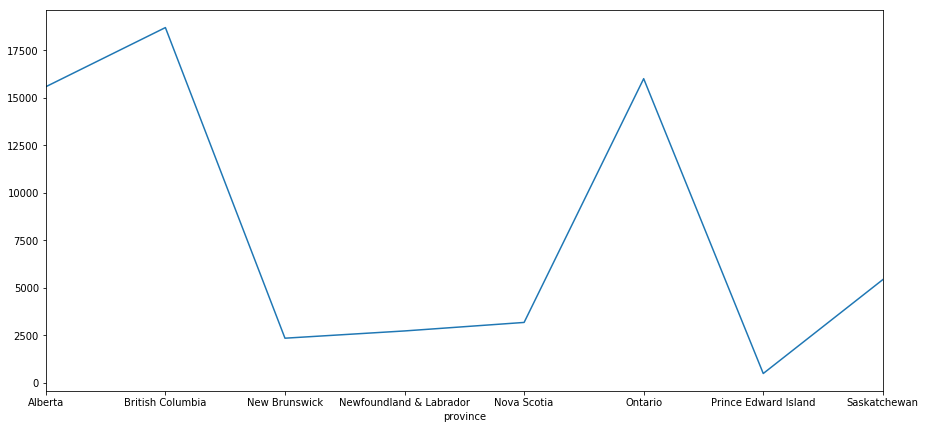

In [94]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['province'])['status'].count().plot(ax=ax)

In [26]:
#dd=db.properties.find( {"country": "US"} ).count()

/Users/jatinmalhotra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


In [85]:
def get_properties():
    #data=db.properties.find().limit(100000)
    data=db.properties.find( {"country": "Canada"})
    
    #data=db.properties.find(no_cursor_timeout=True).limit(600000).batch_size(1000).max_time_ms(99999999)
    #dd=db.properties.find({country: {$in : ["Canada","CA"] } } )

    df = pd.DataFrame.from_dict(data, orient='columns')
    return df

def get_agents():
    data=db.agents.find().limit(10)
    df = pd.DataFrame.from_dict(data, orient='columns')
    return df


def get_locations():

    data=db.locations.find().limit(10)
    df = pd.DataFrame.from_dict(data, orient='columns')
    return df


import requests
def get_properties_api_call(p_api_url_base="https://be-prod.nestready.co/v3/properties/"
                            , p_api_token="your_api_token"):
    
    
    headers = {'Content-Type': 'application/json'}
    
    
    response = requests.get(p_api_url_base, headers=headers)

    if response.status_code == 200:
        data= json.loads(response.content.decode('utf-8'))
    
        #print(data)
        return data
    else:
        return "Error Returned -  "+ str(response.status_code)
    
    

In [86]:
from datetime import datetime

l_start_time = datetime.today()
#time.sleep(10)

df_properties=get_properties()

l_end_time=datetime.today()

print(l_end_time - l_start_time)


#CursorNotFound: cursor id 59279913480 not found
    

0:00:00.000536


In [88]:
df_properties.shape

(0, 0)

In [82]:
df.groupby(['province','status'])['status'].count()

KeyError: 'country'

In [113]:
a

country
CA           11
Canada    10921
Mexico        2
PR          180
US        86518
dtype: int64

In [68]:
#print(df)
df_properties.columns

Index(['_id', 'address_number', 'address_street', 'agent_avatar_url',
       'agent_email', 'agent_external_id', 'agent_fname', 'agent_id',
       'agent_key', 'agent_lname',
       ...
       'tax_amount', 'three_quarter_bathrooms', 'total_sqft', 'type',
       'unit_number', 'updated_at', 'utilities', 'water', 'water_heater',
       'year_built'],
      dtype='object', length=145)

In [71]:
df_properties.shape

(400000, 145)

In [32]:
from datetime import datetime

l_start_time = datetime.today()

df_properties.to_csv("prop.csv")

l_end_time=datetime.today()

print(l_end_time - l_start_time)


0:00:10.384838


In [34]:
for i in df_properties.columns:
    print(i)

_id
address_number
address_street
agent_email
agent_external_id
agent_fname
agent_id
agent_key
agent_lname
agent_name
agent_phone
architecture_style
available_showing
basement
bathrooms
beds
brokerage
brokerage_email
brokerage_external_id
brokerage_logo_url
brokerage_name
brokerage_phone
brokerage_website_url
building_sqft
building_type
building_utilities
city
cooling_systems
country
cover_public_url
created_at
description
disclose_address
exterior_types
external_id
external_type
fireplaces
floors
floors_number
foreclosure
full_baths
furnished
garage
geocoded
half_baths
has_attic
has_barbecue_area
has_basement
has_ceiling_fan
has_deck
has_disabled_access
has_dock
has_doorman
has_double_pane_windows
has_elevator
has_fireplace
has_garden
has_gated_entry
has_green_house
has_hot_tub_spa
has_jetted_bath_tub
has_mother_in_law
has_patio
has_pond
has_pool
has_porch
has_rv_parking
has_sauna
has_security_system
has_skylight
has_sports_court
has_sprinkler_system
has_vaulted_ceiling
has_wet_bar
he

In [35]:
df_properties.head(100)

,_id,address_number,address_street,agent_email,agent_external_id,agent_fname,agent_id,agent_key,agent_lname,agent_name,...,tax_amount,three_quarter_bathrooms,total_sqft,type,unit_number,updated_at,utilities,water,water_heater,year_built
0,598115d8e26bff1ac1a0a70a,304 #309,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,1398,sale,None,2019-04-06 17:01:08.783,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
1,598115d9d7d1fe6eb6efd684,304 #312,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,1363,sale,None,2019-04-06 17:01:08.786,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
2,598115e8d7d1fe6eb6efd6a1,304 #304,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,1617,sale,None,2019-04-06 17:01:08.791,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
3,598115e9e26bff1ac1a0a748,304 #303,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,890,sale,None,2019-04-06 17:01:08.794,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
4,598129fbe26bff1ac1a147ac,2585,500,NaN,8652,NaN,NaN,NaN,NaN,Linda Cox,...,916,NaN,3000,sale,None,2019-04-06 17:01:08.932,"Cook Top Gas, Dishwasher, Dryer, Oven/Range-Ga...",,Gas,1985.0
5,5992499dd7d1fe2abefa6ec8,304 (#210),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1847,sale,None,2019-04-08 11:01:45.775,,CITY,,2016.0
6,5992499dd7d1fe2abefa6ed0,304 (#209),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1398,sale,None,2019-04-08 11:01:45.770,,CITY,,2016.0
7,599249a6d7d1fe2abefa6edd,304 (#313),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,816,sale,None,2019-04-08 11:01:45.779,,CITY,,2016.0
8,59924c11d7d1fe2abefa808e,304 (#201),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1368,sale,None,2019-04-08 11:01:45.794,,CITY,,2016.0
9,59924c18d7d1fe2abefa80df,304 (#202),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1344,sale,None,2019-04-08 11:01:45.798,,CITY,,2016.0


In [36]:
df_agents=get_agents()
df_agents.columns

Index(['_id', 'chat', 'created_at', 'creator_id', 'email', 'email_cc', 'image',
       'intro', 'kind', 'name', 'nmls', 'partner_id', 'phone', 'photo', 'rule',
       'slug', 'tags', 'title', 'updated_at', 'updater_id', 'version'],
      dtype='object')

In [37]:
df_agents.head()

,_id,chat,created_at,creator_id,email,email_cc,image,intro,kind,name,...,partner_id,phone,photo,rule,slug,tags,title,updated_at,updater_id,version
0,59766759b5e1b52055000001,True,2017-07-24 21:32:09.696,NaN,yourhome@nestready.co,NaN,"{'_id': 59766759b5e1b52055000002, 'url': 'http...",Get in touch with a top-rated real estate agen...,brokerage,NestReady,...,597f44e6b5e1b5a449000001,877-725-5799,nestready-portrait.png,(?-mix:.*),nestready,"[brokerage, unbranded, rotation]",Real Estate Broker,2018-08-16 17:24:10.399,NaN,NaN
1,59766759b5e1b52055000003,False,2017-07-24 21:32:09.700,5b802a69b11eaa00018fe5bf,yourhome@nestready.co,,"{'_id': 59766759b5e1b52055000004, 'url': 'http...",Get in touch with a senior loan officer to fin...,mortgage,Ruoff Home Mortgage,...,59766750b5e1b56808000001,(800) 627 8633,ruoff-portrait.png,.*,ruoff-home-mortgage-team,"[generic, rotation]",Senior Loan Officers,2018-09-06 18:22:13.968,5b802a69b11eaa00018fe5bf,6.0
2,598a2c37b5e1b56520000002,False,2017-08-08 21:27:17.782,NaN,lending@firstbankpb.bank,NaN,"{'_id': 598a2dabb5e1b56520000004, 'url': 'http...",Get in touch with a qualified loan officer in ...,mortgage,First Bank Lending Team,...,59766750b5e1b56808000002,(561) 847-2711,ffbf-portrait.png,(?-mix:.*),first-bank-lending-team,"[firstbank, ffbf, us, mortgage, rotation]",,2018-08-16 17:24:10.403,NaN,NaN
3,598a2cb9b5e1b56520000003,False,2017-08-08 21:28:17.964,NaN,residential@bostonprivate.com,NaN,"{'_id': 598a2fc0b5e1b56520000007, 'url': 'http...",Get in touch with a qualified loan officer in ...,mortgage,Boston Private Loan Officer,...,59775e22b5e1b56ca0000001,(617) 912-3622,bostonprivate-portrait.png,(?-mix:.*),boston-private-loan-officer,"[bostonprivate, us, mortgage, rotation]",,2018-08-16 17:24:10.406,NaN,NaN
4,59a061d92fdd649acc000001,False,2017-08-25 17:43:53.570,NaN,questions@alterna.ca,NaN,"{'_id': 59a063fb2fdd649acc000003, 'url': 'http...",Get in touch with a qualified loan officer in ...,mortgage,Alterna Bank,...,597f46cbb5e1b5a449000003,866-560-0120,alterna-portrait.png,(?-mix:.*),alterna-bank,"[alterna, canada, mortgage, rotation]",Mortgage Team,2018-08-16 17:24:10.519,NaN,NaN


In [40]:
df_locations=get_locations()
df_locations.head()

,_id,bounding_box,geometry,level,location_attribute,location_graph_id,medium_price,medium_price_sqft,name,page_available,resource_number,tags,total_properties,updated_at,weight
0,597796a2b5e1b578d5000001,"[37.201540000370755, 40.63880099956651, -82.64...","{'type': 'Polygon', 'coordinates': [[[-81.7472...",state,"{'_id': 597796a2b5e1b578d5000002, 'age_0004': ...",None,14500000.0,25190.0,west virginia,True,01:54,[],897,2018-09-17 20:53:30.454,1
1,597796a2b5e1b578d5000003,"[24.39630799961452, 31.000967999873353, -87.63...","{'type': 'MultiPolygon', 'coordinates': [[[[-8...",state,"{'_id': 597796a2b5e1b578d5000004, 'age_0004': ...",None,30890000.0,18379.0,florida,True,01:12,[],60210,2018-09-17 20:53:28.918,1
2,597796a2b5e1b578d5000005,"[36.970297999852846, 42.50848099959853, -91.51...","{'type': 'Polygon', 'coordinates': [[[-91.1852...",state,"{'_id': 597796a2b5e1b578d5000006, 'age_0004': ...",None,17900000.0,19385.0,illinois,True,01:17,[],8744,2018-09-17 20:53:30.493,1
3,597796a2b5e1b578d5000007,"[43.499360999710404, 49.384358000221596, -97.2...","{'type': 'Polygon', 'coordinates': [[[-96.7843...",state,"{'_id': 597796a2b5e1b578d5000008, 'age_0004': ...",None,22500000.0,22372.0,minnesota,True,01:27,[],4653,2018-09-17 20:53:28.982,1
4,597796a2b5e1b578d5000009,"[37.88660500002078, 39.72303700015749, -79.487...","{'type': 'Polygon', 'coordinates': [[[-77.4588...",state,"{'_id': 597796a2b5e1b578d500000a, 'age_0004': ...",None,32500000.0,21922.0,maryland,True,01:24,[],3438,2018-09-17 20:53:30.529,1


In [41]:
data=get_properties_api_call(p_api_url_base="https://be-prod.nestready.co/v3/properties/5cbeb3636f695c0001d4f8c7")
#data=get_properties_api_call()

In [42]:
import pandas as pd
df_api = pd.DataFrame.from_dict(data, orient='index')


In [43]:
df_api

,id,address_street,address_number,unit_number,city,postal,province,country,description,latitude,...,has_sports_court,has_sprinkler_system,has_vaulted_ceiling,has_wet_bar,location_ids,lower_location_id,geocoded,cashback_cents,images,photos
property,5cbeb3636f695c0001d4f8c7,Hillside Terrace,17,Unit: D,White Plains,10601-1144,NY,US,Welcome to Hillside Terrace's rare three bedro...,41.033986,...,None,None,None,None,"[597796a2b5e1b578d500004d, 597796f7b5e1b5f5d70...",59779890b5e1b56c1a008df1,False,234500.0,"[{'id': '5cbeb3636f695c0001d4f8b5', 'url': 'ht...",[]


In [44]:
for i in df_api.columns:
    print(i)

id
address_street
address_number
unit_number
city
postal
province
country
description
latitude
longitude
listing_status
listing_url
listing_date
lead_routing_email
partial_bathrooms
rooms
modified_at
external_id
external_type
mls_number
brokerage_external_id
brokerage_name
brokerage_phone
brokerage_email
brokerage_website_url
brokerage_logo_url
agent_fname
agent_lname
agent_phone
agent_email
agent_avatar_url
agent_id
agent_key
price_cents
price_cents_sqft
tax_amount
total_sqft
lot_sqft
building_sqft
beds
year_built
floors
utilities
building_utilities
tags
cover_public_url
fees
school
foreclosure
num_floors
parking_types
bathrooms
property_type
property_sub_type
architecture_style
room_count
roof_types
cooling_systems
exterior_types
heating_fuels
heating_systems
open_houses
is_new_construction
is_waterfront
is_wired
intercom
has_barbecue_area
has_basement
has_ceiling_fan
has_deck
has_disabled_access
has_dock
has_doorman
has_double_pane_windows
has_elevator
has_fireplace
has_garage
has_g

In [45]:
cnt=0
for i in df_api.columns:
    if i in df_properties.columns:
        "null"
    else:
        cnt=cnt+1
        print(i)
print(cnt)

id
agent_avatar_url
fees
school
has_garage
cashback_cents
photos
7


In [8]:
from nest_recom_spark_session import nest_get_spark_session
obj=nest_get_spark_session()

sc,sqlContext = obj.start_or_get_spark(
                        app_name="NestReadyRecommendationEngine", 
                        url='local[2]',
                        memory="20g"
                        )

In [177]:
sc

In [17]:
pd_person = pd.DataFrame({'PERSONID':'0','LASTNAME':'Doe','FIRSTNAME':'John','ADDRESS':'Museumplein','CITY':'Amsterdam'}, index=[0])
#Create PySpark DataFrame Schema

#Create Spark DataFrame from Pandas
df_person = sqlContext.createDataFrame(pd_person)

df_person.show()

NameError: name 'sqlContext' is not defined

In [46]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 140 entries, _id to year_built
dtypes: bool(1), datetime64[ns](5), float64(13), int64(3), object(118)
memory usage: 10.6+ MB


In [47]:
df_properties.shape

(10000, 140)

In [48]:
df_properties.describe()

,bathrooms,beds,floors_number,full_baths,half_baths,latitude,longitude,num_floors,one_quarter_bathrooms,open_houses,partial_bathrooms,price_cents,price_cents_sqft,room_count,three_quarter_bathrooms,year_built
count,9944.000000,10000.000000,6070.000000,10000.00000,9994.000000,10000.000000,10000.000000,5737.000000,9912.000000,0.0,9912.000000,1.000000e+04,9.119000e+03,3545.000000,9912.000000,8820.000000
mean,2.895615,3.295000,1.837273,2.35820,0.460576,37.244627,-89.625863,1.782421,0.001412,NaN,0.523204,7.796354e+07,5.349911e+04,8.000564,0.063761,1982.347732
std,1.829712,1.525781,5.613794,1.49737,0.669336,5.838924,14.456359,5.707318,0.037558,NaN,0.751863,1.991323e+08,1.532227e+06,22.830579,0.335518,39.132416
min,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-159.494934,0.000000,0.000000,NaN,0.000000,1.000000e+02,0.000000e+00,0.000000,0.000000,1111.000000
25%,2.000000,3.000000,1.000000,2.00000,0.000000,33.861757,-93.638531,1.000000,0.000000,NaN,0.000000,1.699000e+07,9.795500e+03,6.000000,0.000000,1969.000000
50%,3.000000,3.000000,1.500000,2.00000,0.000000,37.925567,-85.385287,1.500000,0.000000,NaN,0.000000,3.400000e+07,1.602900e+04,7.000000,0.000000,1995.000000
75%,4.000000,4.000000,2.000000,3.00000,1.000000,41.280294,-80.251123,2.000000,0.000000,NaN,1.000000,6.950000e+07,2.637850e+04,9.000000,0.000000,2007.000000
max,33.000000,41.000000,420.000000,20.00000,15.000000,61.193559,0.000000,420.000000,1.000000,NaN,15.000000,8.500000e+09,9.968820e+07,1348.000000,8.000000,2020.000000


In [62]:
df_properties.isnull().sum().sort_values(ascending=False)

scoring                    400000
open_houses                400000
fees                       400000
agent_avatar_url           400000
furnished                  399973
state                      399973
type                       399972
short_term                 399972
has_doorman                399775
open_house_count           399684
has_green_house            399271
is_cable_ready             398708
showing_date               398609
available_showing          398609
has_attic                  398187
water                      398142
main_level_sqft            398101
stories                    398053
has_sauna                  397935
foreclosure                397182
water_heater               397182
intercom                   396948
roof                       396935
has_double_pane_windows    396832
pool                       396746
has_gated_entry            396145
patio                      396129
agent_name                 396063
agent_external_id          396063
has_mother_in_

In [61]:
a=df_properties.isnull().sum().sort_values(ascending=False)

In [89]:
(df_properties.isna().mean().round(4)*100).sort_values(ascending=False)

agent_avatar_url     100.00
open_houses          100.00
type                 100.00
furnished            100.00
scoring              100.00
short_term           100.00
fees                 100.00
state                100.00
open_house_count      99.96
is_cable_ready        99.87
available_showing     99.85
showing_date          99.85
has_attic             99.82
water                 99.80
main_level_sqft       99.79
stories               99.79
water_heater          99.69
intercom              99.68
pool                  99.67
roof                  99.67
patio                 99.61
agent_external_id     99.58
agent_name            99.58
living_area           99.47
fireplaces            99.34
basement              99.13
tags                  99.06
floors_number         99.00
garage                98.99
parking               98.79
                      ...  
bathrooms              3.66
roof_types             3.54
location_ids           2.92
lower_location_id      2.92
listing_url         

In [51]:
# drop unecessary features (more than 50% records are null)
drop_features=["scoring", 
               "fees",
               "agent_avatar_url",
               "open_houses",
               "furnished",
               "short_term",
               "state",
               "type",
               "has_doorman",
               "open_house_count",
               "has_green_house",
               "is_cable_ready",
               "showing_date",
               "available_showing",
               "has_attic",
               "water",
               "main_level_sqft",
               "stories",
               "has_sauna",
               "foreclosure",
               "water_heater",
               "intercom",
               "roof",
               "has_double_pane_windows",
               "pool",
               "has_gated_entry",
               "patio",
               "agent_name",
               "agent_external_id",
               "has_mother_in_law"]
               

df_properties_drop=df_properties.drop(drop_features, axis=1)

In [28]:
a=df_properties_drop.isnull().sum()

NameError: name 'df_properties_drop' is not defined

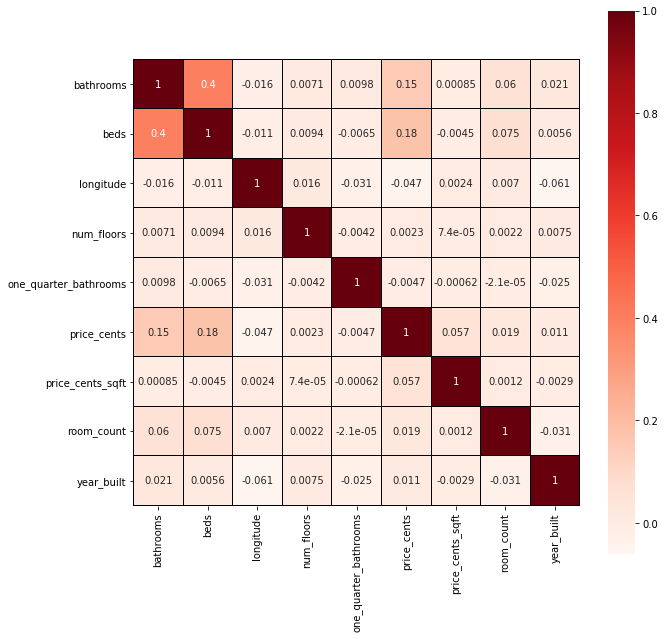

In [52]:
# Find out correlation among features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#plt.figure()

sns.heatmap(df_properties_drop.corr(), square=True, annot=True, cmap='Reds',linecolor="black", linewidths=0.10)
plt.show()

In [53]:
df_properties_drop.describe()

,bathrooms,beds,longitude,num_floors,one_quarter_bathrooms,price_cents,price_cents_sqft,room_count,year_built
count,97593.000000,100000.000000,100000.000000,58463.000000,16610.000000,9.999200e+04,8.075800e+04,26442.000000,92313.000000
mean,2.693923,3.269670,-88.470752,2.192937,0.001686,6.295481e+07,4.401631e+04,7.546744,1987.389208
std,2.720553,1.407305,15.168717,23.862181,0.042467,2.630372e+08,2.605288e+06,29.997512,172.890513
min,0.000000,0.000000,-166.518392,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1000.000000
25%,2.000000,3.000000,-94.152788,1.000000,0.000000,1.799990e+07,1.046400e+04,5.000000,1972.000000
50%,2.000000,3.000000,-82.528874,1.500000,0.000000,3.250000e+07,1.559400e+04,7.000000,1992.000000
75%,3.000000,4.000000,-80.098725,2.000000,0.000000,5.750000e+07,2.355500e+04,9.000000,2007.000000
max,700.000000,99.000000,153.004488,5000.000000,2.000000,6.199000e+10,5.000000e+08,3200.000000,9999.000000


In [54]:
df_properties_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 105 entries, _id to year_built
dtypes: datetime64[ns](3), float64(8), int64(1), object(93)
memory usage: 80.1+ MB


In [56]:
data=db.properties.find().limit(10)
#df = pd.DataFrame.from_dict(data, orient='columns')


In [59]:
data

In [60]:
!pip install pymongo_spark

  Could not find a version that satisfies the requirement pymongo_spark (from versions: )
No matching distribution found for pymongo_spark


In [61]:
pymongo_spark.activate()

NameError: name 'pymongo_spark' is not defined

In [6]:
df_properties

,_id,address_number,address_street,agent_email,agent_external_id,agent_fname,agent_id,agent_key,agent_lname,agent_name,...,tax_amount,three_quarter_bathrooms,total_sqft,type,unit_number,updated_at,utilities,water,water_heater,year_built
0,598115d8e26bff1ac1a0a70a,304 #309,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,1398,sale,None,2019-04-06 17:01:08.783,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
1,598115d9d7d1fe6eb6efd684,304 #312,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,1363,sale,None,2019-04-06 17:01:08.786,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
2,598115e8d7d1fe6eb6efd6a1,304 #304,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,1617,sale,None,2019-04-06 17:01:08.791,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
3,598115e9e26bff1ac1a0a748,304 #303,Kirkwood,NaN,34983,NaN,NaN,NaN,NaN,Scott Owens,...,1,NaN,890,sale,None,2019-04-06 17:01:08.794,"Dishwasher, Dryer, Garbage Disposal, Oven/Rang...",,Electric,2016.0
4,598129fbe26bff1ac1a147ac,2585,500,NaN,8652,NaN,NaN,NaN,NaN,Linda Cox,...,916,NaN,3000,sale,None,2019-04-06 17:01:08.932,"Cook Top Gas, Dishwasher, Dryer, Oven/Range-Ga...",,Gas,1985.0
5,5992499dd7d1fe2abefa6ec8,304 (#210),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1847,sale,None,2019-04-08 11:01:45.775,,CITY,,2016.0
6,5992499dd7d1fe2abefa6ed0,304 (#209),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1398,sale,None,2019-04-08 11:01:45.770,,CITY,,2016.0
7,599249a6d7d1fe2abefa6edd,304 (#313),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,816,sale,None,2019-04-08 11:01:45.779,,CITY,,2016.0
8,59924c11d7d1fe2abefa808e,304 (#201),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1368,sale,None,2019-04-08 11:01:45.794,,CITY,,2016.0
9,59924c18d7d1fe2abefa80df,304 (#202),Kirkwood,NaN,,NaN,NaN,NaN,NaN,10225,...,1,NaN,1344,sale,None,2019-04-08 11:01:45.798,,CITY,,2016.0


In [ ]:
##Normalize all the continuous variables into one range (0-1)
##Normalize the categorical variables as a One Hot Enconder
##Apply Similarity algorithms like Pearson Correlation / Distance algorithms like (Euclidean, Cosine similarity)
